In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sts
from scipy import optimize as opt
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
Weibull = np.genfromtxt('Weibull.csv', delimiter=',')

In [3]:
Weibull[:50]

array([ 0.26,  0.29,  0.65,  2.58,  0.07,  0.2 ,  0.05,  0.73,  2.5 ,
        0.16,  1.24,  0.66,  2.44,  0.35,  3.71,  2.92,  1.  ,  0.51,
        0.52,  0.25,  0.43,  0.39,  0.04,  0.03,  0.75,  1.43,  0.55,
        0.32,  2.53,  0.13,  3.73,  1.13,  1.55,  0.37,  3.07,  0.05,
        0.04,  1.04,  0.06,  0.45,  1.68,  1.36,  1.24,  1.39,  1.76,
        0.42,  0.11,  0.21,  2.6 ,  0.08])

In [4]:
# Функция, считающая логарифм плотности
def log_p(x, gamma):
    if x == 0:
        x = 0.0001
    return math.log10(1 - math.exp(-(x**gamma)) )
# Логарифмическая функция правдоподобия
def L(gamma, k):
    return sum( [ log_p(x, gamma) for x in Weibull[:k] ] )

Оценка параметра формы  -0.492396635082


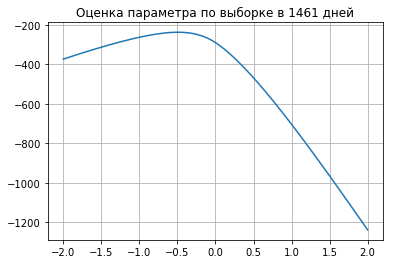

Оценка параметра формы  -0.485519483833


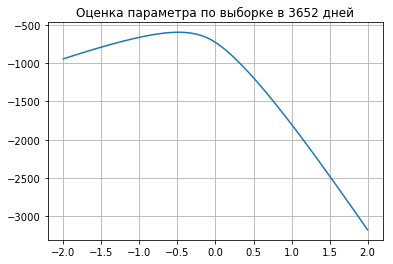

In [5]:
# Размеры выборок, для которых будем оценивать параметр
K = [4 * 365 + 1, len(Weibull)]
# Результаты отпимизации функции правдоподобия
Gamma_opt = []
for k in K:
    # Начальное значение параметра
    gamma0 = 1
    # Ищем максимум функции правдоподобия
    gamma_opt = opt.minimize(lambda gamma: -L(gamma, k), [gamma0], method='L-BFGS-B', options={'eps':0.001} )
    Gamma_opt.append(gamma_opt)
    # Построим график функции правдоподобия для текущей выборки
    X = np.linspace(-2, 2, 400)
    Y = [L(x, k) for x in X]
    print("Оценка параметра формы ", gamma_opt.x[0])
    plt.subplot()
    plt.title("Оценка параметра по выборке в %d дней" %(k))
    plt.plot(X,Y)
    plt.grid()
    plt.show()

Значение логарифмической функции правдоподобия уменьшилось в 2 раза, потому что в ней стало в 2 раза больше слогаемых.